<a href="https://colab.research.google.com/github/Ximenaloranca/Ecuaciones-Diferenciales-Parciales-/blob/main/Ecuaci%C3%B3n%20de%20calor.%20Metodo%20de%20Richardson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Método implícito de Richardson**

Vamos a resolver la ecuacion de calor utilizando el metodo implicito en diferencias finitas

Siendo
$$\frac{\partial u}{\partial t} = \alpha^2 \frac{\partial^2 u}{\partial x^2}$$
con su condicion inicial
$$u(x, 0) = f(x) = \sin(\pi x)$$
y su condicion de frontera
$$u(0, t) = 0 \quad \text{y} \quad u(1, t) = 0$$
Usamos diferencias regresivas en el tiempo y diferencia central para el espacio, es decir
$$\frac{\partial u}{\partial t} \approx \frac{u_i^j - u_i^{j-1}}{k}
$$ y $$\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1}^j - 2u_i^j + u_{i-1}^j}{h^2}$$
Sustituyendo en la ecuacion de calor tenemos
$$\frac{u_i^j - u_i^{j-1}}{k} = \alpha^2 \left( \frac{u_{i+1}^j - 2u_i^j + u_{i-1}^j}{h^2} \right)$$
Haciendo  
 $$\lambda = \frac{\alpha^2 k}{h^2}$$

 Tenemos
 $$u_i^j - \lambda (u_{i+1}^j - 2u_i^j + u_{i-1}^j) = u_i^{j-1}$$
 Simplificando
 $$u_i^{j-1}= -\lambda u_{i-1}^j + (1 + 2\lambda)u_i^j - \lambda u_{i+1}^j$$

**Problema a resolver:**  


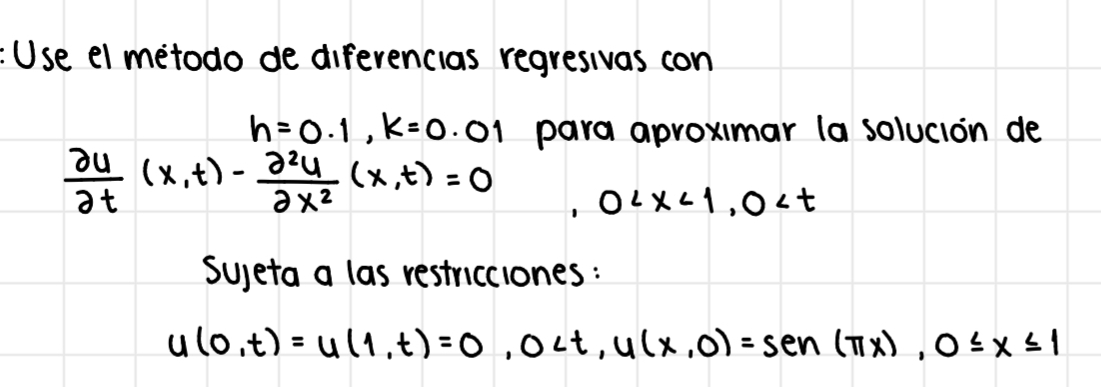

Dado el problema que vimos en clase, sabemos que  $$\alpha^2 = 1$$
Entonces tenemos $$\lambda = \frac{0.01}{(0.1)^2} = 1$$
Sustituimos a lambda en la ecuacion y asi tenemos
$$ -u_{i-1}^j + 3u_i^j - u_{i+1}^j = u_i^{j-1}$$

In [179]:
#Agregamos todas las librerias que se ocupan durante el programa
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [180]:
def f(x):
 return np.sin(np.pi*x) #Definimos la condición inicial u(x, 0) = sin(pi*x)

In [181]:
#Definimos la matriz A entrada por entrada
A = sp.Matrix([[3,-1,0,0,0,0,0,0,0],
               [-1,3,-1,0,0,0,0,0,0],
               [0,-1,3,-1,0,0,0,0,0],
               [0,0,-1,3,-1,0,0,0,0],
               [0,0,0,-1,3,-1,0,0,0],
               [0,0,0,0,-1,3,-1,0,0],
               [0,0,0,0,0,-1,3,-1,0],
               [0,0,0,0,0,0,-1,3,-1],
               [0,0,0,0,0,0,0,-1,3]])

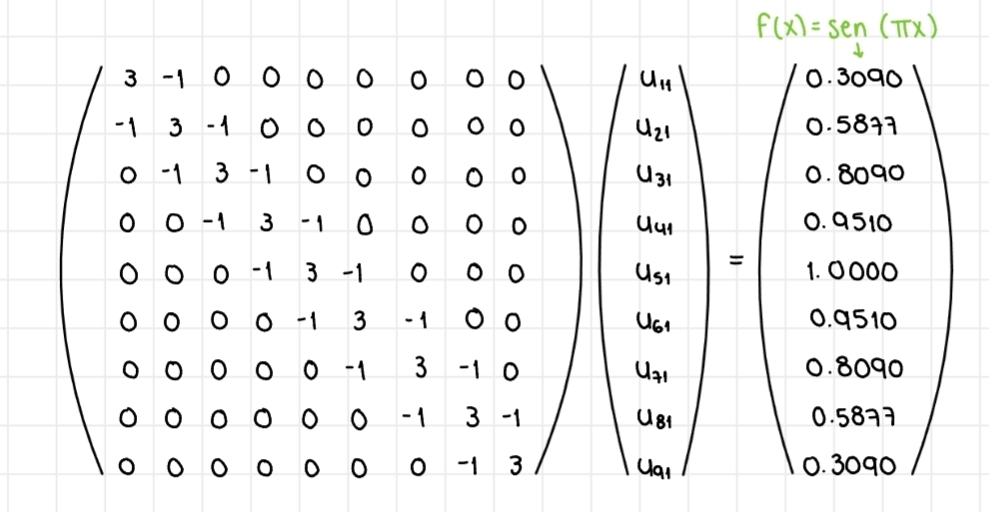

In [182]:
A #Se imprime A para ver que si sea la matriz correcta

Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

Ejercicio 1: Falicitamos la matriz A, para no tener que escribir cada entrada.

Para esto usamos los valores de h, k y lambda

In [183]:
# Definimos los parámetros
h = 0.1      # Paso espacial
k = 0.01     # Paso temporal
N = 9        # Tamaño de la matriz
lamb = 1   # Lamda que ya habiamos calculado antes
alpha_sq = 1 # Alfa calculado ya antes

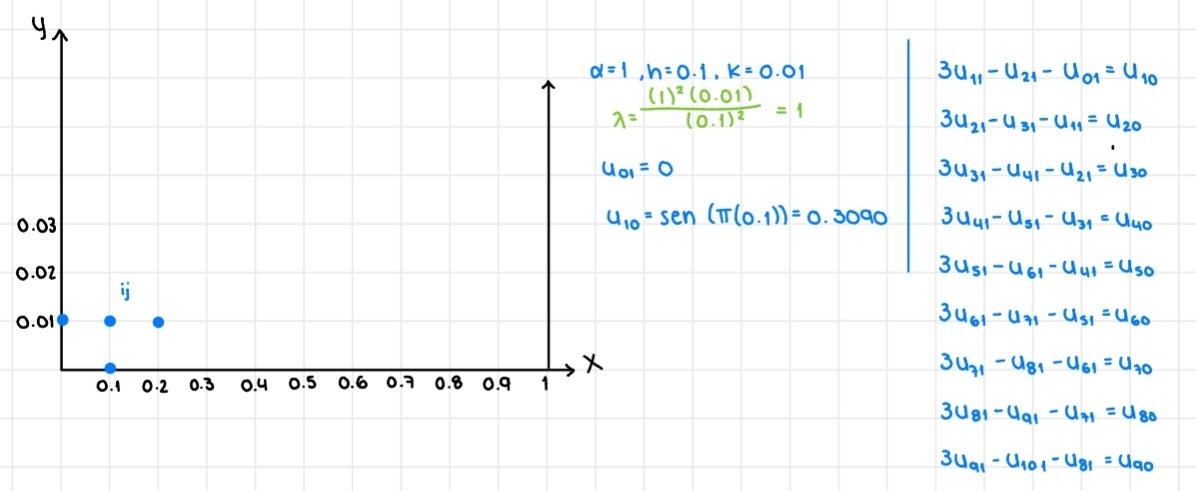

In [184]:
# Creamos la matriz A de manera mas sencilla
def crear_matriz_A(N, lamb): #Esta parte genera una matriz tridiagonal A con el formato sympy
    main_diag_val = (1 + 2 * lamb)
    off_diag_val = -lamb

    # Creamos una matriz inicial de puros 0
    A = sp.zeros(N, N)
    # Llenamos la diagonal
    for i in range(N):
        A[i, i] = main_diag_val
    # Llenamos las entradas de la diagonal superior
    for i in range(N - 1):
        A[i, i + 1] = off_diag_val
    # Llenamos los datos de la diagonal inferior
    for i in range(N - 1):
        A[i + 1, i] = off_diag_val

    return A

# Generamos la matriz
A = crear_matriz_A(N, lamb)
A # Imprimimos la matriz A

Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

In [185]:
b = sp.Matrix([f(0.1),f(0.2),f(0.3),f(0.4),f(0.5),f(0.6),f(0.7),f(0.8),f(0.9)]) #Definimos las entradas de b

In [186]:
b #Imprimimos la matriz b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

Ejercicio 2: Definimos las entradas de b, pero ahora mas simple

In [187]:
#Creamos b mas simple
def crear_vector_b(N, h): #Aqui generamos b con la condición inicial y evaluando f(x) en cada nodo interno

    # Genera la lista de coordenadas x de los nodos internos
    x_nodes = [h * i for i in range(1, N + 1)]
    # Se evalua f(x) en cada nodo
    b_valores = [f(x_val) for x_val in x_nodes]
    # Convierte la lista a un vector columna, usamos sympy
    return sp.Matrix(b_valores)

# Generamos el vector
b = crear_vector_b(N, h)

b # Imprimimos b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

In [188]:
A.LUsolve(b)

Matrix([
[0.281465217775586],
[0.535378658951812],
[0.736885506787377],
[ 0.86626086703537],
[ 0.91084057802358],
[ 0.86626086703537],
[0.736885506787377],
[0.535378658951812],
[0.281465217775587]])

In [189]:
def richardson (A, b, j): # Definimos una funcion para la matriz, el vector y el numero de pasos que vamos a calcular del tiempo
  S = [] # Creamos una lista vacia para guardar las soluciones
  b_1 = b.copy() # Creamos una variable temporal para que guarde los estados recientes

  for i in range(j+1):
    S.append(np.array(b_1, dtype=float).reshape(-1)) # Aqui tomamos el estado actual antes de calcular el nuevo
    sol = A.LUsolve(b_1) # Este calcula la solucion del siguiente paso
    b_1 = sol # Actualiza el estado
  return np.array(S)

Ejercicio 4: Graficamos para un valor particular de t > 0 y la comparamos contra la gráfica de la solución exacta

Tomamos en cuenta que la solución exacta para este problema es:
$$u(x, t) = e^{-\alpha^2 \pi^2 t} \sin(\pi x)$$
y como $$\alpha^2 = 1$$
sustituimos y tenemos $$u(x, t) = e^{-\pi^2 t} \sin(\pi x)$$

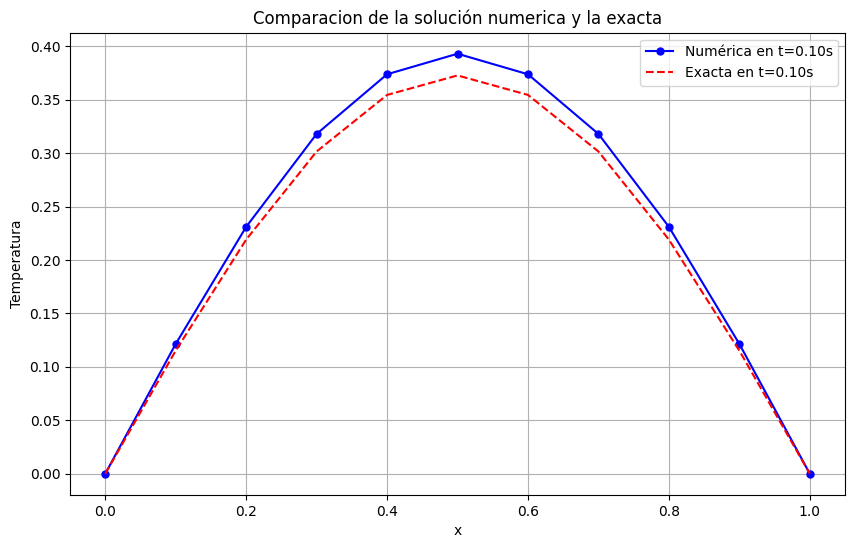

In [190]:
def u_exacta(x, t, alpha_sq): # Calculamos la solución exacta de la ecuación del calor
    return np.exp(-alpha_sq * (np.pi**2) * t) * np.sin(np.pi * x)

# Elegimos t = 0.1
t_comparacion = 0.1

# Calculamos el índice j=10 que corresponde a este tiempo
j_index = int(t_comparacion / k)

# Obtenemos la solución numérica para la fila 10
u_numerica_t_final = U[j_index, :]

# Calculamos las coordenadas de x
x_full = np.linspace(0, 1, N + 2) # Incluimos dd 0 a 1
u_numerica_padded = np.insert(u_numerica_t_final, 0, 0)
u_numerica_padded = np.append(u_numerica_padded, 0)

# Calculamos la solución exacta en t=0.1
u_exacta_t_final = u_exacta(x_full, t_comparacion, alpha_sq)

# Graficamos las dos soluciones
plt.figure(figsize=(10, 6))
plt.plot(x_full, u_numerica_padded, 'bo-', label=f'Numérica en t={t_comparacion:.2f}s', markersize=5)
plt.plot(x_full, u_exacta_t_final, 'r--', label=f'Exacta en t={t_comparacion:.2f}s')
plt.title('Comparacion de la solución numerica y la exacta')
plt.xlabel('x')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(True)
plt.show()

Podemos ver en la comparacion que la grafica esta mostrando mucha igualdad, pero la curva numerica es mas alta, esto significa que es menos fría que la exacta de t=0.2, porque pasa menos tiempo para que el calor se desvanesca

Ejercicio 5: ¿Es necesario resolver el sistema de 9 x 9?

En este caso no es necesario porque tenemos un problema que tiene simetria, podemos ver esto en los nodos:
$$u_1^j = u_9^j$$ $$u_2^j = u_8^j$$ $$u_3^j = u_7^j$$ $$u_4^j = u_6^j$$

In [191]:
j = 20 # Numero de pasos en el tiempo

In [192]:
U = richardson(A, b, j)

In [193]:
x = np.linspace(0, 1, 9) # Numero de nodos internos en x
y = np.linspace(0, 0.6, j+1) # Debe coincidir con el tamaño de j por k
X, Y = np.meshgrid(x, y)

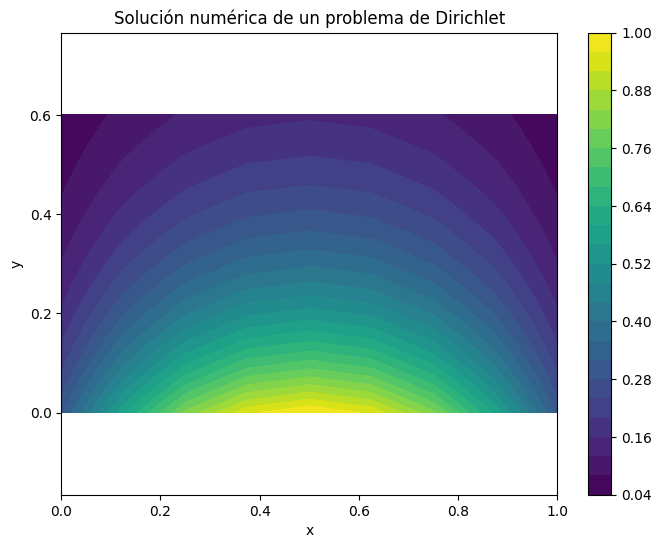

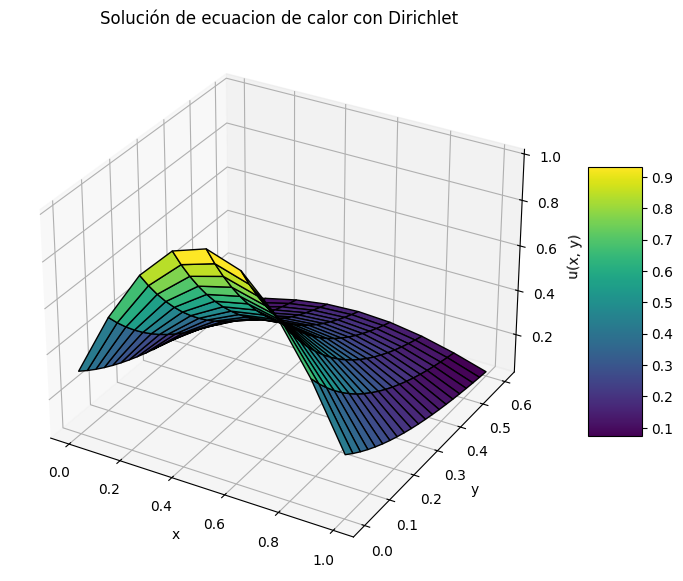

In [194]:
# Mapa de colores

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de Dirichlet')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de ecuacion de calor con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

 **Explicacion de las graficas**

 En la primera grafica podemos ver como el calor del centro va desapareciendo a medida que avanza el tiempo, es una vista por arriba de la simulacion.

 En la segunda grafica podemos ver que se dibuja la temperatura como una colina, podemos entender que la temperatura, en este caso se ve como la altura, disminuye en todos los puntos a medida que pasa el tiempo

Ejercicio 6: Hay un ligero detalle con la precisión de estas gráficas, ¿cuál?


Que las graficas son imprecisas porque no incluyen los datos de las fronteras, como lo vimos en clase, las fronteras son 0, entonces no estan incluyendo esos valores de la frontera y por lo mismo los ejes de tiempo y espacio no coinciden con los parametros

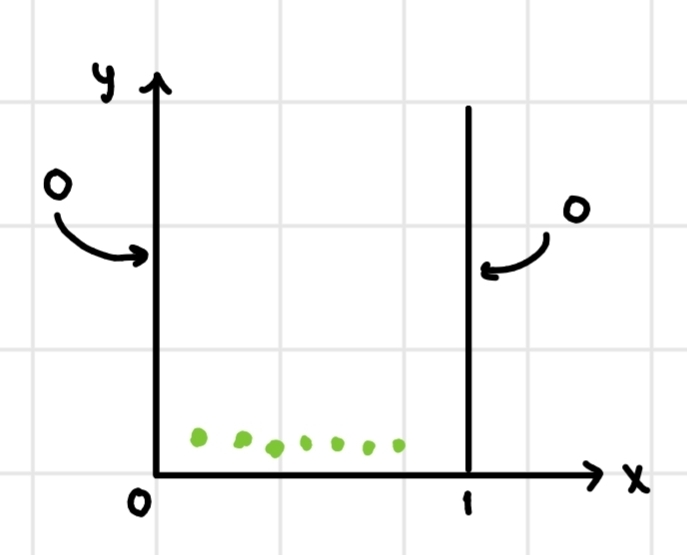